<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **프로젝트: 고양이 수염 스티커 만들기**

# 1 개요

## 1-1. 목표

## 1-2. 사전준비

In [2]:
import matplotlib.pyplot as plt
import numpy as n기
import cv2
import dlib

# 2 스티커 download하기

In [19]:
# !rm -r /content/models
# !mkdir -p /content/models
!wget -O /content/models/landmarks.dat.bz2 http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/models/landmarks.dat.bz2
!rm /content/models/landmarks.dat

--2022-05-26 14:35:19--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/models/landmarks.dat.bz2’

/content/models/lan 100%[===================>]  61.07M  51.6MB/s    in 1.2s    

2022-05-26 14:35:20 (51.6 MB/s) - ‘/content/models/landmarks.dat.bz2’ saved [64040097/64040097]



In [3]:
!rm -r /content/images
!mkdir -p /content/images
!wget -O /content/images.zip https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode08/images.zip
!unzip /content/images.zip -d /content/images
!rm /content/images.zip

rm: cannot remove '/content/images': No such file or directory
--2022-05-26 14:15:24--  https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode08/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206500 (202K) [application/zip]
Saving to: ‘/content/images.zip’

/content/images.zip 100%[===================>] 201.66K  --.-KB/s    in 0.02s   

2022-05-26 14:15:24 (8.09 MB/s) - ‘/content/images.zip’ saved [206500/206500]

Archive:  /content/images.zip
  inflating: /content/images/1.jpg   
  inflating: /content/images/2.jpg   
  inflating: /content/images/3.jpg   
  inflating: /content/images/4.jpg   
  inflating: /content/images/5.jpg   
  inflating: /content/images/55.jpg  
  inflating: /content/images/6.jpg   
  inflating: /cont

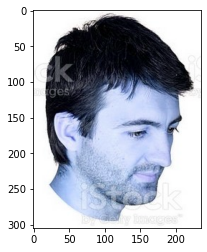

In [5]:
# 준비한 이미지를 읽기
my_image_path = '/content/images/1.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

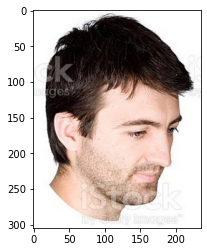

In [6]:
# dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주었습니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
backup_img_rgb = img_rgb.copy()      # TEST용
plt.imshow(img_rgb)
plt.show()

(512, 512, 3)


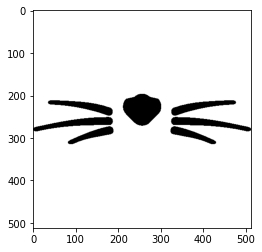

In [7]:
# 준비한 스티커 이미지를 읽기
sticker_path = '/content/images/CatWhiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
backup_img_sticker = img_sticker.copy()      # TEST용
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# 3 얼굴 검출 & 랜드마크 검출 하기

> 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

## 3-1. 얼굴 검출 face detection

In [8]:
# 그럼 dlib을 활용해 hog detector를 선언해 보겠습니다.
# detector를 선언합니다. hog: Histograms of Oriented Gradients
detector_hog = dlib.get_frontal_face_detector()

In [9]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
'''
detector_hog의 두 번째 파라미터는 이미지 피라미드의 수입니다. 
이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다. 
이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다. 
'''
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(81, 116) (236, 270)]]


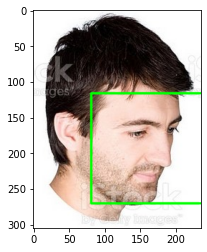

In [10]:
# 찾은 얼굴을 화면에 출력해보겠습니다.

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

'''
dlib detector 는 dlib.rectangles 타입의 객체를 반환합니다. 
dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있습니다.
dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함하고 있습니다.
'''
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 2-2. 얼굴 랜드마크 face landmark

In [20]:
# 저장한 landmark 모델을 불러옵니다.
model_path = '/content/models/landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [21]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


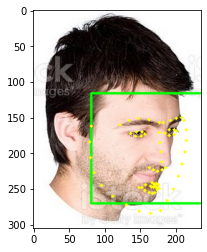

In [22]:
# 랜드마크를 영상에 출력해 보겠습니다.

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### dlibLandmarkOrder.png 보여주기

# Step 3. 스티커 적용 위치 확인하기
 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
 코 끝인 33 번보다 좋은 위치가 있을 거예요.

In [ ]:
# 코의 index는 33기준, 좌표를 먼저 확인해 보겠습니다.

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # print (landmark[30]) # 코의 index는 30 입니다
    print (landmark[33]) # 코끝의 index는 33 입니다
    # print (landmark[19]) # 오른쪽 눈썹의 index는 30 입니다
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(263, 143)
(x,y) : (263,143)
(w,h) : (108,108)


In [ ]:
# 스티커 이미지를 resize하기
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(108, 108, 3)


In [ ]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# refined_x = x - w // 2
# refined_y = y - h
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (209,89)


# Step 4. 스티커 적용하기
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요?
스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [ ]:
# TEST용 backup for img_sticker
backup_img_sticker = img_sticker.copy()      # TEST용
print(id(img_sticker))
print(id(backup_img_sticker))

2313658672656
2313572949552


In [ ]:
# [중요] opencv데이터는 numpy ndarray형태의 데이터를 사용하므로, ndarray는 음수 인덱스에 접근할 수 없어 음수에 대한 예외처리필요
'''
 위의 경우에서는 y축 좌표의 값만 음수로 나왔지만 x축 좌표의 값도 음수로 나올 수 있겠죠?
 사실 스티커가 원본 이미지의 범위를 넘어가는 경우는 하나 더 있습니다. 
 바로 스티커의 시작점 + 스티커 사진의 크기가 원본 이미지의 크기보다 큰 경우입니다. 
 스티커 사진의 오른쪽이나 아래쪽으로 넘어가는 경우죠. 
 이 경우는 어떻게 처리해야 하는지 생각해보세요.
'''
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (209,89)


In [ ]:
# TEST용 backup for img_show and img_rgb
backup_img_rgb = img_rgb.copy()      # TEST용
backup_img_show = img_show.copy()      # TEST용
print(id(img_rgb))
print(id(backup_img_rgb))
print(id(img_show))
print(id(backup_img_show))

2313544742160
2313572245520
2313658822224
2313658923984


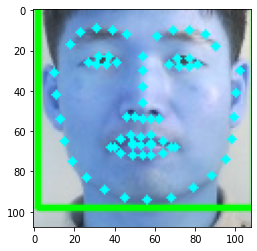

In [ ]:
# 원본 이미지에 스티커를 적용하기 위해서, 우선, sticker area 계산합니다.
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(sticker_area)
plt.show()

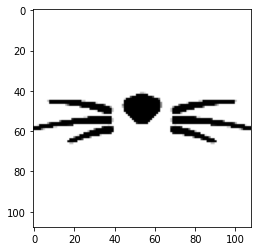

In [ ]:
# 참고로, img_sticker 영상을 확인해봅니다.
plt.imshow(img_sticker)
plt.show()

In [ ]:
# 마지막으로, 본영상img_show의 상기 sticker area영역에 대해서, img_show와 img_sticker 합성 계산
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

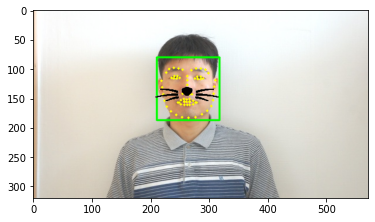

In [ ]:
# 결과 이미지를 출력하면,
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

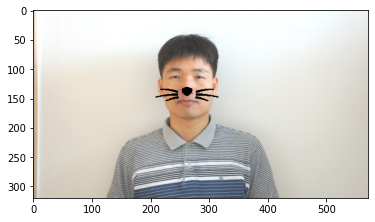

In [ ]:
# bounding box와 landmark를 제거한 최종 결과 출력위해, img_show 대신, 아껴 두었던 img_bgr 적용
# img_show에 행했던 과정을 img_bgr에 그대로 적용
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()